In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

from geopy.distance import distance


In [4]:
data = pd.read_csv('Cleaned_Hospitals_v7.csv')

In [5]:
data

,Unnamed: 0,Hospital name,City,County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,...,Street Address,State,Hospital Zip Code,Full Address,City Zip Code,City Latitude,City Longtitude,Median Income,Population,Joined
0,0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,...,1035 Red Bud Road Northeast,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30702.0,34.487833,-84.850071,24110,40820,False
1,1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,...,707 Old Dalton Ellijay Road,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,24457,33460,False
2,2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,...,915 Gordon Avenue,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31776.5,30.862504,-83.928812,22498,20703,False
3,3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,...,903 North Court Street,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,24644,9062,False
4,5,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,...,90 East Stephens Street,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,21584,8419,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,657,NaN,Wrens,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30833.0,33.200325,-82.376250,18634,3065,True
613,658,NaN,Wrightsville,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31096.0,32.717320,-82.689260,20232,7046,True
614,659,NaN,Yatesville,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31097.0,32.912207,-84.148120,27000,1656,True
615,660,NaN,Young Harris,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30582.0,34.954638,-83.864840,15867,5038,True


In [7]:


newdata = data[['City','Population','Median Income','Acute Care Beds']]
cityagg = data.groupby('City')
newdata = newdata.merge(pd.DataFrame(cityagg.nunique()['Hospital name']), on = 'City', how = 'left').rename(columns = {'Hospital name':'HospitalCount'})
newdata['BedsPer1000'] = 1000*newdata['Acute Care Beds']/newdata['Population']
newdata.head(100)

,City,Population,Median Income,Acute Care Beds,HospitalCount,BedsPer1000
0,Calhoun,40820,24110,69,1,1.690348
1,Chatsworth,33460,24457,29,1,0.866707
2,Thomasville,20703,22498,264,1,12.751775
3,Quitman,9062,24644,25,1,2.758773
4,Camilla,8419,21584,25,1,2.969474
...,...,...,...,...,...,...
95,Brunswick,18080,-133314971,316,1,17.477876
96,Riverdale,32009,24951,331,1,10.340842
97,Adel,10836,25632,60,1,5.537099
98,Tifton,18474,25598,181,1,9.797553


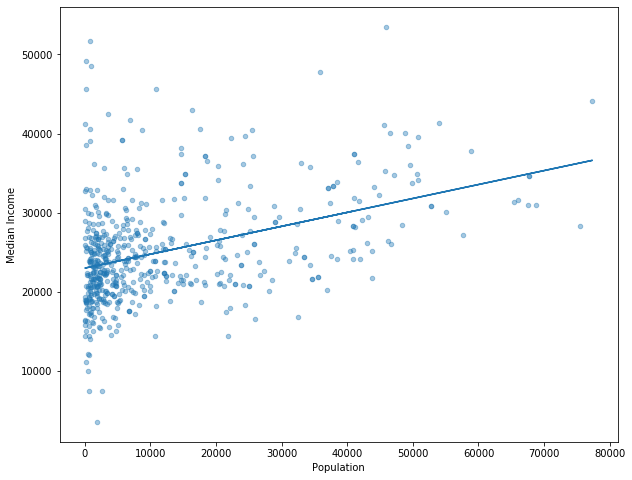

In [8]:
pltdata =  newdata.loc[newdata['Median Income'] > 0]
pltdata.plot(kind = 'scatter', x = 'Population',y = 'Median Income', figsize = (10,8),alpha = .4)
(m,b,r,p,err) = st.linregress(x=pltdata['Population'],y = pltdata['Median Income'])
regress_values =  m*pltdata['Population']+ b
plt.plot(pltdata['Population'],regress_values)

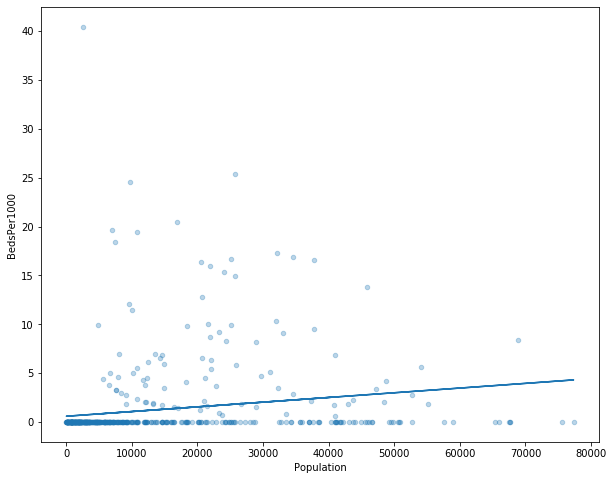

In [9]:

pltdata.plot(kind = 'scatter', x = 'Population',y = 'BedsPer1000', figsize = (10,8), alpha = .3)

(m,b,r,p,err) = st.linregress(x=pltdata['Population'],y = pltdata['BedsPer1000'])
regress_values =  m*pltdata['Population']+ b
plt.plot(pltdata['Population'],regress_values)

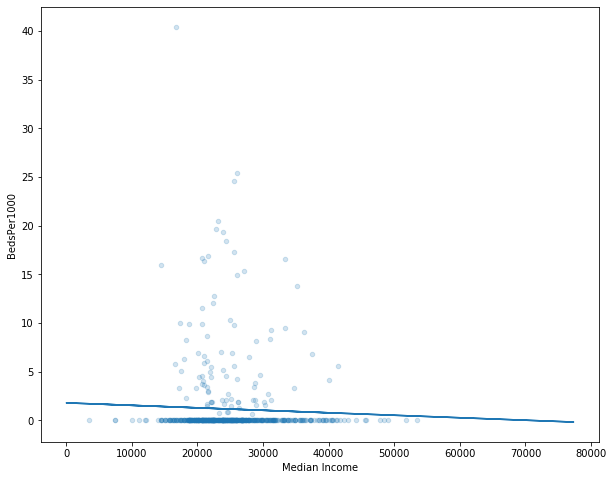

In [10]:
pltdata.plot(kind = 'scatter', x = 'Median Income',y = 'BedsPer1000', figsize = (10,8), alpha = .2)


(m,b,r,p,err) = st.linregress(x=pltdata['Median Income'],y = pltdata['BedsPer1000'])
regress_values =  m*pltdata['Population']+ b
plt.plot(pltdata['Population'],regress_values)

C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


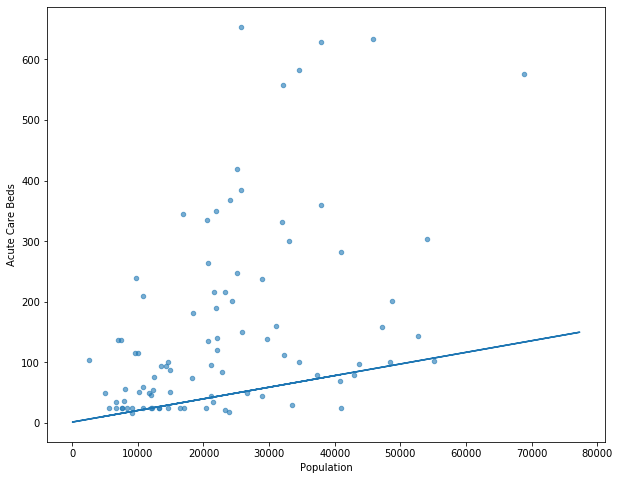

In [12]:

pltdata['BedsFilter'] = pltdata['Acute Care Beds'] == 0 # = pltdata['Acute Care Beds'].astype(int)
bedsdata = pltdata.loc[pltdata['BedsFilter']== False]
bedsdata['Acute Care Beds'] = bedsdata['Acute Care Beds'].astype(float)
bedsdata.plot(kind = 'scatter', x = 'Population',y = 'Acute Care Beds', figsize = (10,8), alpha = .6)



(m,b,r,p,err) = st.linregress(x=pltdata['Population'],y = pltdata['Acute Care Beds'])
regress_values =  m*pltdata['Population']+ b
plt.plot(pltdata['Population'],regress_values)

In [13]:
county_agg = data.groupby('County')
county_sum = county_agg.sum()
county_data = county_sum[['Acute Care Beds', 'Population']]
county_data['BedsPer1000'] = 1000*county_data['Acute Care Beds']/county_data['Population']
county_data

C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Acute Care Beds,Population,BedsPer1000
County,,,
Baldwin County,140,22130,6.326254
Barrow County,80,42975,1.861547
Bartow County,112,32313,3.466097
Ben Hill County,75,18322,4.093440
Berrien County,51,10237,4.981928
...,...,...,...
Washington County,116,9636,12.038190
Wayne County,115,9990,11.511512
Whitfield County,282,40921,6.891327


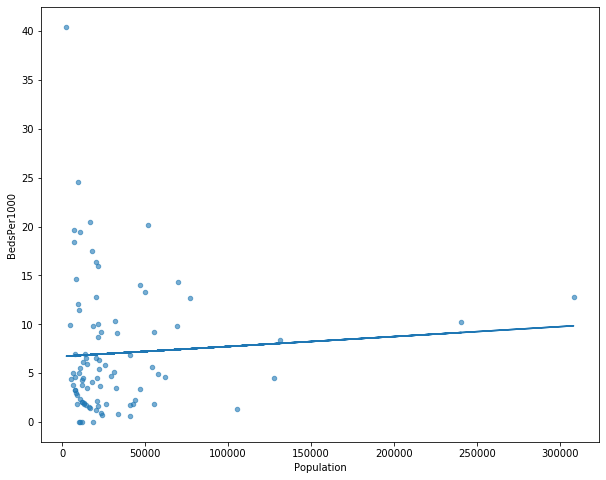

In [14]:
county_data.plot(kind = 'scatter', x = 'Population',y = 'BedsPer1000', figsize = (10,8), alpha = .6)


(m,b,r,p,err) = st.linregress(x=county_data['Population'],y = county_data['BedsPer1000'])
regress_values =  m*county_data['Population']+ b
plt.plot(county_data['Population'],regress_values)

In [65]:
city_geodata = data[['City','County',  'City Latitude', 'City Longtitude', 'Population', 'Median Income']]
hospital_geodata = data[['Hospital name','Hospital Latitude', 'Hospital Longtitude']]


In [66]:
hospital_geodata = hospital_geodata.loc[hospital_geodata['Hospital name'].isna()!=True]
hospital_geodata

,Hospital name,Hospital Latitude,Hospital Longtitude
0,AdventHealth Gordon,34.510205,-84.926304
1,AdventHealth Murray,34.779956,-84.783038
2,Archbold Memorial Hospital,30.825169,-83.972128
3,Archbold - Brooks County Hospital,30.795039,-83.559146
4,Archbold - Mitchell County Hospital,31.229773,-84.205317
...,...,...,...
118,Wills Memorial Hospital,33.728625,-82.742521
119,Candler Hospital,32.027829,-81.100126
120,Memorial Health University Medical Center,32.030295,-81.088798
121,Fannin Regional Hospital,34.917735,-84.374330


In [44]:
fives = []
tens = []
twenties = []
fifties = []
hundreds = []
nearesthospitaldistance = []

for city in city_geodata.iterrows():
    
    fivemiles = 0
    tenmiles = 0
    twentymiles = 0
    fiftymiles = 0
    hundredmiles = 0

    city_coord = city[1]['City Latitude'],city[1]['City Longtitude']
    distances = []
    
    for row in hospital_geodata.iterrows():
        
        if pd.isna(city_coord[0]) == True or pd.isna(city_coord[1]) == True:
            print('Skipping due to Null city Coordinates...')
        else:
            hospital_coord = row[1]['Hospital Latitude'],row[1]['Hospital Longtitude']

            d = distance(city_coord , hospital_coord ).miles
            distances.append(d)
            
            if d <= 100:
                hundredmiles = hundredmiles + 1
            if d <= 50:
                fiftymiles = fiftymiles + 1
            if d <= 20:
                twentymiles = twentymiles + 1
            if d <= 10:
                tenmiles = tenmiles + 1
            if d <= 5:
                fivemiles = fivemiles + 1

    
    
    fives.append(fivemiles)
    tens.append(tenmiles)
    twenties.append(twentymiles)
    fifties.append(fiftymiles)
    hundreds.append(hundredmiles)
    nearesthospitaldistance.append(min(distances))



In [67]:
city_geodata['WithinFiveMiles'] = fives
city_geodata['WithinTenMiles'] = tens
city_geodata['WithinTwentyMiles'] = twenties
city_geodata['WithinFiftyMiles'] = fifties
city_geodata['WithinHundredMiles'] = hundreds
city_geodata['DistanceToNearestHospital'] = nearesthospitaldistance



C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [68]:
city_geodata

,City,County,City Latitude,City Longtitude,Population,Median Income,WithinFiveMiles,WithinTenMiles,WithinTwentyMiles,WithinFiftyMiles,WithinHundredMiles,DistanceToNearestHospital
0,Calhoun,Gordon County,34.487833,-84.850071,40820,24110,1,1,1,22,59,4.615698
1,Chatsworth,Murray County,34.753129,-84.775020,33460,24457,1,1,3,12,57,1.904655
2,Thomasville,Thomas County,30.862504,-83.928812,20703,22498,1,1,1,9,20,3.639262
3,Quitman,Brooks County,30.783639,-83.553430,9062,24644,1,1,2,10,21,0.855741
4,Camilla,Mitchell County,31.209854,-84.236670,8419,21584,1,1,1,9,23,2.308497
...,...,...,...,...,...,...,...,...,...,...,...,...
612,Wrens,NaN,33.200325,-82.376250,3065,18634,0,0,0,9,43,23.397404
613,Wrightsville,NaN,32.717320,-82.689260,7046,20232,0,0,1,9,49,19.855915
614,Yatesville,NaN,32.912207,-84.148120,1656,27000,0,0,2,18,75,11.117247
615,Young Harris,NaN,34.954638,-83.864840,5038,15867,0,2,2,8,53,6.330752


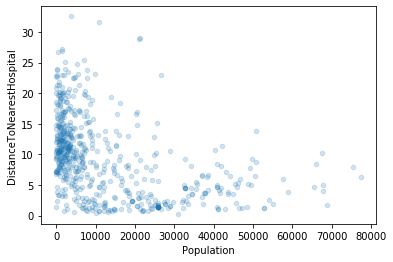

In [80]:
city_geodata.plot(kind = 'scatter', x = 'Population', y = 'DistanceToNearestHospital', alpha = .2)


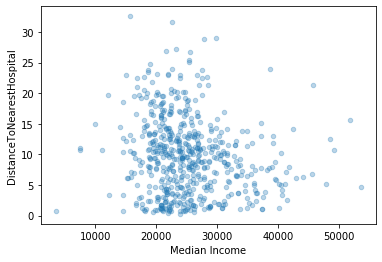

In [81]:
city_geodata2 = city_geodata.loc[city_geodata['Median Income'] > 0]
city_geodata2.plot(kind = 'scatter', x = 'Median Income', y = 'DistanceToNearestHospital', alpha = .3)
